In [1]:
import pickle
import matplotlib.pyplot as plt
import sklearn.metrics
import femr.datasets
import femr.labelers
import numpy as np

In [2]:
targets = {
    'Logistic Regression': 'logistic_predictions.pkl',
    'LightGBM': 'gbm_predictions.pkl',
    'MOTOR': 'motor_predictions.pkl',
    'CLMBR': 'clmbr_predictions.pkl'
}

test_patients = np.load('../saved_labels_same_day_pan3/test_patients.npy')

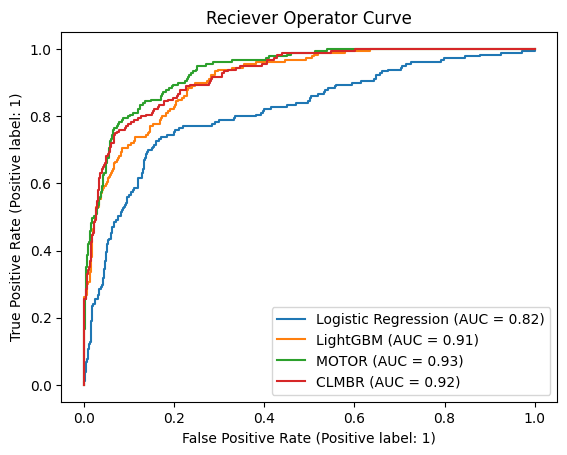

In [3]:
fig = plt.figure()

plt.title("Reciever Operator Curve")

for name, target in targets.items():
    with open('../saved_labels_same_day_pan3/' + target, 'rb') as f:
        predictions = pickle.load(f)
    
    probabilities, pids, labels, timestamps = predictions
    test_mask = np.isin(pids, test_patients)

    display =  sklearn.metrics.RocCurveDisplay.from_predictions(
        labels[test_mask], probabilities[test_mask], ax=plt.gca(), name=name,
    )

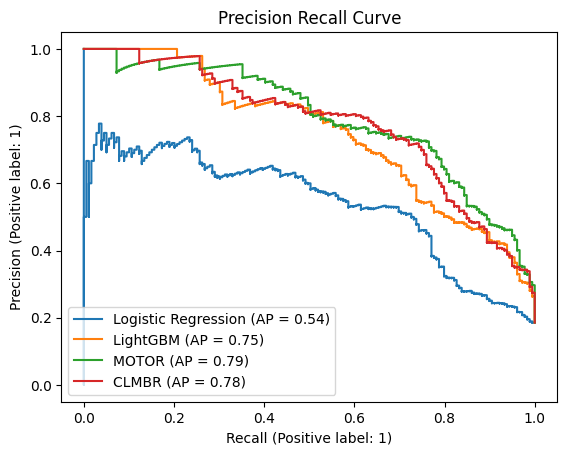

In [4]:
fig = plt.figure()

plt.title("Precision Recall Curve")

for name, target in targets.items():
    with open('../saved_labels_same_day_pan3/' + target, 'rb') as f:
        predictions = pickle.load(f)
    
    probabilities, pids, labels, timestamps = predictions
    test_mask = np.isin(pids, test_patients)

    display =  sklearn.metrics.PrecisionRecallDisplay.from_predictions(
        labels[test_mask], probabilities[test_mask], ax=plt.gca(), name=name,
    )